# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [3]:
#Import the AG news dataset (same as hw01)
#Download them from here (or open it locally)
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd

df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1: "world", 2: "sport", 3: "business", 4: "sci/tech"}


def replace_label(x):
    return label_map[x]


df["label"] = df["label"].apply(replace_label)
df["text"] = df["title"] + " " + df["lead"]
df.head()

,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [4]:
import spacy

dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')


def split_into_sentences(text):
    return [i for i in nlp(text).sents]


##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
dfs['sentences'] = dfs['text'].apply(split_into_sentences)

dfs.head(2)


,label,title,lead,text,sentences
20644,sci/tech,Secrecy Hides Cancer Data,Many clinical cancer trials are not published ...,Secrecy Hides Cancer Data Many clinical cancer...,"[(Secrecy, Hides, Cancer, Data, Many, clinical..."
75745,sci/tech,"ICANN moves closer to approving .post, .travel...",Internet users may soon see two new domain nam...,"ICANN moves closer to approving .post, .travel...","[(ICANN, moves, closer, to, approving, .post, ..."


In [5]:
##TODO print the first sentence of the first document in your sample
dfs.iloc[0]['sentences'][0]

Secrecy Hides Cancer Data Many clinical cancer trials are not published in order to keep industry secrets.

In [6]:
# Get the first token
dfs.iloc[0]['sentences'][0][0]

Secrecy

In [7]:
dfs.iloc[0]['sentences'][0][0].is_punct

False

In [8]:
# TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct) nor stopwords (x.is_stop)
# the column lowercase will combine all tokens of a document, i.g. all tokens (from different sentences) get combined into one array
def get_usefull_tokens(sentences):
    usefully_tkns = [tkn for tkns in sentences for tkn in tkns]
    usefully_tkns = list(filter(lambda tkn: not tkn.is_punct and not tkn.is_stop, usefully_tkns))
    usefully_tkns = list(map(lambda tkn: str(tkn).lower(), usefully_tkns))
    return usefully_tkns


dfs['lowercase'] = dfs['sentences'].apply(get_usefull_tokens)
dfs

,label,title,lead,text,sentences,lowercase
20644,sci/tech,Secrecy Hides Cancer Data,Many clinical cancer trials are not published ...,Secrecy Hides Cancer Data Many clinical cancer...,"[(Secrecy, Hides, Cancer, Data, Many, clinical...","[secrecy, hides, cancer, data, clinical, cance..."
75745,sci/tech,"ICANN moves closer to approving .post, .travel...",Internet users may soon see two new domain nam...,"ICANN moves closer to approving .post, .travel...","[(ICANN, moves, closer, to, approving, .post, ...","[icann, moves, closer, approving, .post, .trav..."
7478,business,Toys 'R' Us Swings to 2Q Profit (AP),"AP - Troubled retailer Toys ""R"" Us Inc. report...",Toys 'R' Us Swings to 2Q Profit (AP) AP - Trou...,"[(Toys, ', R, ', Us, Swings, to, 2Q, Profit, (...","[toys, r, swings, 2q, profit, ap, ap, troubled..."
102827,sport,MLB: Pirates Ship Kendall to A's (Reuters),Reuters - The Pittsburgh Pirates\Saturday trad...,MLB: Pirates Ship Kendall to A's (Reuters) Reu...,"[(MLB, :), (Pirates, Ship, Kendall, to, A, 's,...","[mlb, pirates, ship, kendall, reuters, reuters..."
109437,world,Report: Egypt brokers Israeli-Palestinian ceas...,The official news agency of Egypt says leaders...,Report: Egypt brokers Israeli-Palestinian ceas...,"[(Report, :, Egypt, brokers, Israeli, -, Pales...","[report, egypt, brokers, israeli, palestinian,..."
95415,sci/tech,Saving America Online,Maybe I was a bit harsh last week when I was r...,Saving America Online Maybe I was a bit harsh ...,"[(Saving, America, Online, Maybe, I, was, a, b...","[saving, america, online, maybe, bit, harsh, w..."
16390,sci/tech,SCO Slides Again,Picking on SCO Group (Nasdaq: SCOX) is really ...,SCO Slides Again Picking on SCO Group (Nasdaq:...,"[(SCO, Slides, Again, Picking, on, SCO, Group,...","[sco, slides, picking, sco, group, nasdaq, sco..."
70862,sport,Earthquakes Lead Wizards 1-0 in Series,San Jose Earthquakes #39; Dwayne De Rosario ce...,Earthquakes Lead Wizards 1-0 in Series San Jos...,"[(Earthquakes, Lead, Wizards, 1, -, 0, in, Ser...","[earthquakes, lead, wizards, 1, 0, series, san..."
81108,sport,He #39;s at home with history,This was the afternoon before Game 4 between t...,He #39;s at home with history This was the aft...,"[(He, #, 39;s, at, home, with, history), (This...","[39;s, home, history, afternoon, game, 4, yank..."
58072,business,U.S. Oil Over \$54 on Winter Fuel Worries,SINGAPORE (Reuters) - Oil prices surged to ne...,U.S. Oil Over \$54 on Winter Fuel Worries SIN...,"[(U.S., Oil, Over, \$54, on, Winter, Fuel, Wor...","[u.s., oil, \$54, winter, fuel, worries, , si..."


In [9]:
# TODO print the tokens (x.lemma_) and the tags (x.tag_ ) of the first sentence of the first document (doc.sents)
# without filtering out stopwords and punctuation
for tkn in dfs.iloc[0]['sentences'][0]:
    print(tkn.lemma_, tkn.tag_)

Secrecy NNP
Hides NNP
Cancer NNP
Data NNP
many JJ
clinical JJ
cancer NN
trial NNS
be VBP
not RB
publish VBN
in IN
order NN
to TO
keep VB
industry NN
secret NNS
. .


### Noun Chunks

In [10]:
##TODO print the first 20 noun chuncks in your sample corpus (doc.noun_chunks)

nouns = [tkn for sentences in dfs['sentences'].values for tkns in sentences for tkn in tkns if tkn.tag_ == 'NN']
nouns[:20]

[cancer,
 order,
 industry,
 cancer,
 research,
 group,
 .post,
 Internet,
 domain,
 name,
 window,
 community,
 .travel,
 travel,
 industry,
 R,
 retailer,
 company,
 profit,
 quarter]

### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [11]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

In [12]:
named_entities = []
for docs in dfs['sentences'].values:
    for sentences in docs:
        named_entities += sentences.ents

named_entities = list(map(lambda ent: str(ent).split(' '), named_entities))

# print a list of all named entities
named_entities

[['Secrecy', 'Hides', 'Cancer', 'Data', 'Many'],
 ['British'],
 ['two'],
 ['AP'],
 ['AP'],
 ['Us', 'Inc.'],
 ['Monday'],
 ['the', 'latest', 'second', 'quarter'],
 ['the', 'year-ago'],
 ['MLB'],
 ['Reuters'],
 ['Reuters'],
 ['Pittsburgh'],
 ['Jason', 'Kendall'],
 ['Oakland'],
 ['Mark'],
 ['Arthur', 'Rhodes'],
 ['Egypt'],
 ['Israeli'],
 ['peace', '&lt;b&gt;'],
 ['Egypt'],
 ['Israel'],
 ['Palestinians'],
 ['the', 'United', 'States'],
 ['Europe'],
 ['last', 'week'],
 ['AOL'],
 ['Rule', 'Breaker'],
 ['Time', 'Warner'],
 ['39;s'],
 ['NYSE'],
 ['2', 'million'],
 ['the', 'past', 'year'],
 ['SCO', 'Slides', 'Again', 'Picking', 'on', 'SCO', 'Group'],
 ['39;s'],
 ['Foolish'],
 ['San', 'Jose'],
 ['39'],
 ['Dwayne', 'De', 'Rosario'],
 ['the', 'Kansas', 'City', 'Wizards'],
 ['the', 'first', 'half'],
 ['first'],
 ['San', 'Jose'],
 ['Calif.'],
 ['39;s'],
 ['the', 'afternoon'],
 ['Game', '4'],
 ['Yankees'],
 ['the', 'Red', 'Sox'],
 ['October'],
 ['afternoon'],
 ['Newbury', 'St.'],
 ['Boston'],
 ['one']

In [13]:
import numpy as np

##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

count = 0
capital = 0

for tkns in named_entities:
    for tkn in tkns:
        count += 1
        if tkn[:1].isupper():
            capital += 1

capital / count

0.7184873949579832

In [33]:
tokens = []
for docs in dfs['sentences'].values:
    for sentence in docs:

        text_no_namedentities = []
        ents = [e.text for e in sentence.ents]
        for item in sentence:
            if item.text in ents:
                pass
            else:
                text_no_namedentities.append(item.text)
        tokens += text_no_namedentities

# print a list of all named entities
print(tokens)


['Secrecy', 'Hides', 'Cancer', 'Data', 'Many', 'clinical', 'cancer', 'trials', 'are', 'not', 'published', 'in', 'order', 'to', 'keep', 'industry', 'secrets', '.', 'A', 'cancer', 'research', 'group', 'calls', 'for', 'all', 'studies', 'to', 'be', 'published', '--', 'even', 'those', 'with', 'marginal', 'results', '--', 'so', 'doctors', 'are', 'not', 'misled', '.', 'ICANN', 'moves', 'closer', 'to', 'approving', '.post', ',', '.travel', 'domains', 'Internet', 'users', 'may', 'soon', 'see', 'new', 'domain', 'name', 'suffixes', 'in', 'their', 'browser', 'window', ':', '"', '.post', '"', 'to', 'identify', 'the', 'postal', 'community', 'and', '"', '.travel', '"', 'for', 'travel', 'industry', 'associations', 'and', 'organizations', '.', 'Toys', "'", 'R', "'", 'Us', 'Swings', 'to', '2Q', 'Profit', '(', ')', '-', 'Troubled', 'retailer', 'Toys', '"', 'R', '"', 'Us', 'Inc.', 'reported', 'that', 'the', 'company', 'swung', 'to', 'a', 'profit', 'in', 'the', 'latest', 'second', 'quarter', ',', 'compared

In [34]:
##TODO print the ratio of capitalized tokens not being part of a named entity span
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized


count = 0
capital = 0

for tkn in tokens:
        count += 1
        if tkn[:1].isupper():
            capital += 1

capital / count

0.19375

In [35]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

tokens = []
for docs in dfs['sentences'].values:
    for sentence in docs:

        text_no_namedentities = []
        ents = [e.text for e in sentence.ents]

        # drop the first token of every sentence
        for item in sentence[1:]:
            if item.text in ents:
                pass
            else:
                text_no_namedentities.append(item.text)
        tokens += text_no_namedentities

# print a list of all named entities
print(tokens)


['Hides', 'Cancer', 'Data', 'Many', 'clinical', 'cancer', 'trials', 'are', 'not', 'published', 'in', 'order', 'to', 'keep', 'industry', 'secrets', '.', 'cancer', 'research', 'group', 'calls', 'for', 'all', 'studies', 'to', 'be', 'published', '--', 'even', 'those', 'with', 'marginal', 'results', '--', 'so', 'doctors', 'are', 'not', 'misled', '.', 'moves', 'closer', 'to', 'approving', '.post', ',', '.travel', 'domains', 'Internet', 'users', 'may', 'soon', 'see', 'new', 'domain', 'name', 'suffixes', 'in', 'their', 'browser', 'window', ':', '"', '.post', '"', 'to', 'identify', 'the', 'postal', 'community', 'and', '"', '.travel', '"', 'for', 'travel', 'industry', 'associations', 'and', 'organizations', '.', "'", 'R', "'", 'Us', 'Swings', 'to', '2Q', 'Profit', '(', ')', '-', 'Troubled', 'retailer', 'Toys', '"', 'R', '"', 'Us', 'Inc.', 'reported', 'that', 'the', 'company', 'swung', 'to', 'a', 'profit', 'in', 'the', 'latest', 'second', 'quarter', ',', 'compared', 'with', 'a', 'loss', 'in', 'th

In [36]:
count = 0
capital = 0

for tkn in tokens:
    count += 1
    if tkn[:1].isupper():
        capital += 1

capital / count

0.1714898177920686

Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)from wordcloud import WordCloud?

## Term Frequencies

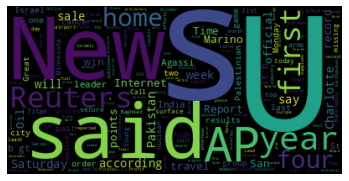

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(min_df=0.01,
                        max_df=0.9,
                        max_features=1000,
                        stop_words='english',
                        use_idf=True,  # the new piece
                        ngram_range=(1, 2))

from wordcloud import WordCloud

##TODO using the whole sample, produce a world cloud with bigrams for each label using tfidf frequencies
text = ' '.join( dfs['text'].values)

# See https://www.datacamp.com/community/tutorials/wordcloud-python
# Create and generate a word cloud image:
wo1rdcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hash Vectorizer

In [161]:
from sklearn.feature_extraction.text import HashingVectorizer
from eli5.sklearn import InvertableHashingVectorizer

corpus = list(map(lambda line: ' '.join(line), dfs['lowercase'].values))

hv = HashingVectorizer(n_features=5000)
ivec = InvertableHashingVectorizer(hv)

X = ivec.fit(corpus)

##TODO print the first 10 features produced by the hash vectorizer

In [162]:
[n[0]['name'] for n in X.get_feature_names().feature_names.values()][0:10]

['39',
 'new',
 'said',
 'ap',
 'reuters',
 'year',
 'saturday',
 'home',
 'pakistan',
 'charlotte']

## Supervised Feature Selection

In [163]:
##TODO compute the number of words per document (excluding stopwords)
dfs['number_of_words'] = dfs['lowercase'].apply(lambda arr: len(arr))
dfs

,label,title,lead,text,sentences,lowercase,number_of_words
20644,sci/tech,Secrecy Hides Cancer Data,Many clinical cancer trials are not published ...,Secrecy Hides Cancer Data Many clinical cancer...,"[(Secrecy, Hides, Cancer, Data, Many, clinical...","[secrecy, hides, cancer, data, clinical, cance...",22
75745,sci/tech,"ICANN moves closer to approving .post, .travel...",Internet users may soon see two new domain nam...,"ICANN moves closer to approving .post, .travel...","[(ICANN, moves, closer, to, approving, .post, ...","[icann, moves, closer, approving, .post, .trav...",24
7478,business,Toys 'R' Us Swings to 2Q Profit (AP),"AP - Troubled retailer Toys ""R"" Us Inc. report...",Toys 'R' Us Swings to 2Q Profit (AP) AP - Trou...,"[(Toys, ', R, ', Us, Swings, to, 2Q, Profit, (...","[toys, r, swings, 2q, profit, ap, ap, troubled...",25
102827,sport,MLB: Pirates Ship Kendall to A's (Reuters),Reuters - The Pittsburgh Pirates\Saturday trad...,MLB: Pirates Ship Kendall to A's (Reuters) Reu...,"[(MLB, :), (Pirates, Ship, Kendall, to, A, 's,...","[mlb, pirates, ship, kendall, reuters, reuters...",21
109437,world,Report: Egypt brokers Israeli-Palestinian ceas...,The official news agency of Egypt says leaders...,Report: Egypt brokers Israeli-Palestinian ceas...,"[(Report, :, Egypt, brokers, Israeli, -, Pales...","[report, egypt, brokers, israeli, palestinian,...",23
95415,sci/tech,Saving America Online,Maybe I was a bit harsh last week when I was r...,Saving America Online Maybe I was a bit harsh ...,"[(Saving, America, Online, Maybe, I, was, a, b...","[saving, america, online, maybe, bit, harsh, w...",27
16390,sci/tech,SCO Slides Again,Picking on SCO Group (Nasdaq: SCOX) is really ...,SCO Slides Again Picking on SCO Group (Nasdaq:...,"[(SCO, Slides, Again, Picking, on, SCO, Group,...","[sco, slides, picking, sco, group, nasdaq, sco...",16
70862,sport,Earthquakes Lead Wizards 1-0 in Series,San Jose Earthquakes #39; Dwayne De Rosario ce...,Earthquakes Lead Wizards 1-0 in Series San Jos...,"[(Earthquakes, Lead, Wizards, 1, -, 0, in, Ser...","[earthquakes, lead, wizards, 1, 0, series, san...",26
81108,sport,He #39;s at home with history,This was the afternoon before Game 4 between t...,He #39;s at home with history This was the aft...,"[(He, #, 39;s, at, home, with, history), (This...","[39;s, home, history, afternoon, game, 4, yank...",18
58072,business,U.S. Oil Over \$54 on Winter Fuel Worries,SINGAPORE (Reuters) - Oil prices surged to ne...,U.S. Oil Over \$54 on Winter Fuel Worries SIN...,"[(U.S., Oil, Over, \$54, on, Winter, Fuel, Wor...","[u.s., oil, \$54, winter, fuel, worries, , si...",34


In [169]:
vocab = ivec.get_feature_names()
vocab = [n[0]['name'] for n in vocab.feature_names.values()]
vocab

['39',
 'new',
 'said',
 'ap',
 'reuters',
 'year',
 'saturday',
 'home',
 'pakistan',
 'charlotte',
 'according',
 'travel',
 'internet',
 'lt',
 'gt',
 'says',
 'time',
 'san',
 'oil',
 'record',
 'marino',
 'points',
 'sales',
 'agassi',
 'india',
 'cancer',
 'group',
 'monday',
 'official',
 'leaders',
 'israel',
 'week',
 'past',
 'city',
 'game',
 'october',
 'st',
 'great',
 'prices',
 'nuclear',
 'surface',
 'linux',
 'secure',
 'today',
 'reports',
 'arms',
 'young',
 'list',
 'missing',
 'titan',
 'minnesota',
 'police',
 'airport',
 '11',
 'leave',
 'flash',
 '10',
 'baghdad',
 'bankruptcy',
 'court',
 'world',
 'data',
 'published',
 'order',
 'industry',
 'research',
 'calls',
 'post',
 'toys',
 'profit',
 'inc',
 'reported',
 'second',
 'pirates',
 'kendall',
 'egypt',
 'israeli',
 'palestinian',
 'peace',
 'europe',
 'online',
 'days',
 'sco',
 'earthquakes',
 'lead',
 'wizards',
 'series',
 'jose',
 'western',
 'conference',
 'calif',
 'afternoon',
 '54',
 'winter',
 'f

In [172]:
##TODO get the most predictive features of the number of words per document using first f_class and then chi2


from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                      max_df=.9,
                      max_features=len(vocab),
                      stop_words='english',
                      ngram_range=(1,3))
X = vec.fit_transform(corpus)

from sklearn.feature_selection import SelectKBest, chi2

select = SelectKBest(chi2, k=10)
X_new = select.fit_transform(X, dfs['number_of_words'])

# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[:10]]


['dan',
 'sadr',
 'gov',
 'july',
 '2004',
 'baghdad',
 'double',
 'china',
 'floods',
 '19']

In [173]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(f_classif, k=10)
X_new = select.fit_transform(X, dfs['number_of_words'])

# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[:10]]

/home/pucyril/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


['iraq',
 'dan',
 'sadr',
 'baghdad',
 'gov',
 'july',
 '2004',
 'view',
 'free',
 'shortened']

Are the results different? What could be a reason for this? 

## Huggingface Tokenizers

In [174]:
# # we use distilbert tokenizer
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [183]:
##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer
tokens = []
for sentences in dfs['sentences'].values:
    for sentence in sentences:
        tokens += tokenizer.tokenize(str(sentence))
tokens

['secrecy',
 'hides',
 'cancer',
 'data',
 'many',
 'clinical',
 'cancer',
 'trials',
 'are',
 'not',
 'published',
 'in',
 'order',
 'to',
 'keep',
 'industry',
 'secrets',
 '.',
 'a',
 'british',
 'cancer',
 'research',
 'group',
 'calls',
 'for',
 'all',
 'studies',
 'to',
 'be',
 'published',
 '-',
 '-',
 'even',
 'those',
 'with',
 'marginal',
 'results',
 '-',
 '-',
 'so',
 'doctors',
 'are',
 'not',
 'mis',
 '##led',
 '.',
 'ic',
 '##ann',
 'moves',
 'closer',
 'to',
 'app',
 '##roving',
 '.',
 'post',
 ',',
 '.',
 'travel',
 'domains',
 'internet',
 'users',
 'may',
 'soon',
 'see',
 'two',
 'new',
 'domain',
 'name',
 'suffix',
 '##es',
 'in',
 'their',
 'browser',
 'window',
 ':',
 '"',
 '.',
 'post',
 '"',
 'to',
 'identify',
 'the',
 'postal',
 'community',
 'and',
 '"',
 '.',
 'travel',
 '"',
 'for',
 'travel',
 'industry',
 'associations',
 'and',
 'organizations',
 '.',
 'toys',
 "'",
 'r',
 "'",
 'us',
 'swings',
 'to',
 '2',
 '##q',
 'profit',
 '(',
 'ap',
 ')',
 'ap',

In [186]:
##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?
len(np.unique(tokens)) / len(tokens)

0.44616673648931715

In [191]:
##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"

count = 0

for tkn in tokens:
    if tkn[0] == '#':
        count += 1

count

154